In [20]:
# ============================================================================
# CONFIGURATION INITIALE - À exécuter une seule fois
# ============================================================================

import os

# Création de la structure de dossiers
print("Création de la structure de dossiers...")
folders = [
    'data/raw',
    'data/processed', 
    'reports/figures',
    'models/saved_models',
    'src'
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)
    
print("Structure créée avec succès!\n")

# Je vérifie ici si le dataset existe
dataset_path = 'data/raw/creditcard.csv'

if os.path.exists(dataset_path):
    print(" Dataset déjà présent!")
else:
    print(" Dataset non trouvé!")
    print("\n Téléchargez-le sur: https://www.kaggle.com/mlg-ulb/creditcardfraud")
    print("   Puis uploadez-le dans Jupyter (bouton Upload)")

Création de la structure de dossiers...
Structure créée avec succès!

 Dataset déjà présent!


In [19]:
import os
if os.path.exists('data/raw/creditcard.csv'):
    print("Fichier trouvé!")
    # Vérification de la taille
    size_mb = os.path.getsize('data/raw/creditcard.csv') / (1024*1024)
    print(f" Taille: {size_mb:.1f} MB")
else:
    print("Fichier non trouvé")
    print(f" Répertoire actuel: {os.getcwd()}")

Fichier trouvé!
 Taille: 143.8 MB


In [14]:
import os

# Création des dossiers du projet
os.makedirs("data/raw", exist_ok=True)
os.makedirs("reports/figures", exist_ok=True)
        
print("Dossiers créés avec succès !")

Dossiers créés avec succès !


In [16]:
import shutil

# Chemin source (fichier que je veux télécharger)
source = r"C:\Users\utilisateur\Desktop\projet\creditcard.csv"
# Chemin destination (dans le projet)
destination = r"C:\Users\utilisateur\data\raw\creditcard.csv"

shutil.move(source, destination)
print("Fichier déplacé vers :", destination)

Fichier déplacé vers : C:\Users\utilisateur\data\raw\creditcard.csv


In [17]:
import os
print(os.path.exists("data/raw/creditcard.csv"))

True


In [18]:
# ============================================================================
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


In [21]:
# ============================================================================
# 2. CHARGEMENT DES DONNÉES
# ============================================================================

# Chargement du dataset
# Pour ce projet, j'utilise le dataset provenant de: https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('data/raw/creditcard.csv')

print(" Dataset chargé")
print(f"Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print("\n" + "="*80 + "\n")

 Dataset chargé
Dimensions: 284807 lignes × 31 colonnes




In [22]:
# ============================================================================
# 3. APERÇU GÉNÉRAL DES DONNÉES
# ============================================================================

print("APERÇU GÉNÉRAL DES DONNÉES")
print("="*80)

# Premières lignes
print("\n Premières lignes du dataset:")
print(df.head())

# Informations générales
print("\n Informations sur les colonnes:")
print(df.info())

# Statistiques descriptives
print("\n Statistiques descriptives:")
print(df.describe())

# Vérification des valeurs manquantes
print("\n Valeurs manquantes:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("Aucune valeur manquante détectée")
else:
    print(missing[missing > 0])

print("\n" + "="*80 + "\n")

APERÇU GÉNÉRAL DES DONNÉES

 Premières lignes du dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.13745

ANALYSE DU DÉSÉQUILIBRE DES CLASSES

 Distribution des classes:
   • Transactions légitimes (0): 284,315 (99.827%)
   • Transactions frauduleuses (1): 492 (0.173%)
   • Ratio de déséquilibre: 1:577


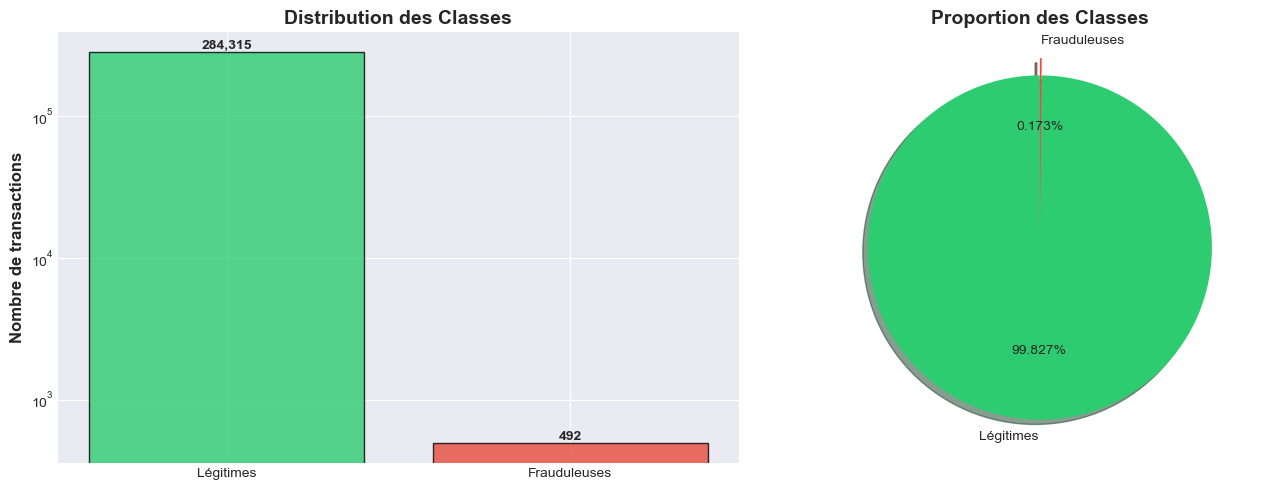


 CONSTAT: Déséquilibre extrême des classes - nécessite SMOTE ou autres techniques




In [23]:
# ============================================================================
# 4. ANALYSE DU DÉSÉQUILIBRE DES CLASSES
# ============================================================================

print("ANALYSE DU DÉSÉQUILIBRE DES CLASSES")
print("="*80)

# Comptage des classes
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print(f"\n Distribution des classes:")
print(f"   • Transactions légitimes (0): {class_counts[0]:,} ({class_percentages[0]:.3f}%)")
print(f"   • Transactions frauduleuses (1): {class_counts[1]:,} ({class_percentages[1]:.3f}%)")
print(f"   • Ratio de déséquilibre: 1:{int(class_counts[0]/class_counts[1])}")

# Visualisation 1: Distribution des classes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Légitimes', 'Frauduleuses'], class_counts.values, 
            color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0].set_ylabel('Nombre de transactions', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution des Classes', fontsize=14, fontweight='bold')
axes[0].set_yscale('log')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1)
axes[1].pie(class_counts.values, labels=['Légitimes', 'Frauduleuses'], 
            autopct='%1.3f%%', colors=colors, explode=explode,
            shadow=True, startangle=90)
axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('reports/figures/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n CONSTAT: Déséquilibre extrême des classes - nécessite SMOTE ou autres techniques")
print("\n" + "="*80 + "\n")

 ANALYSE DE LA VARIABLE TIME

 Période couverte: 2 jours
  Plage horaire: 0h à 24h


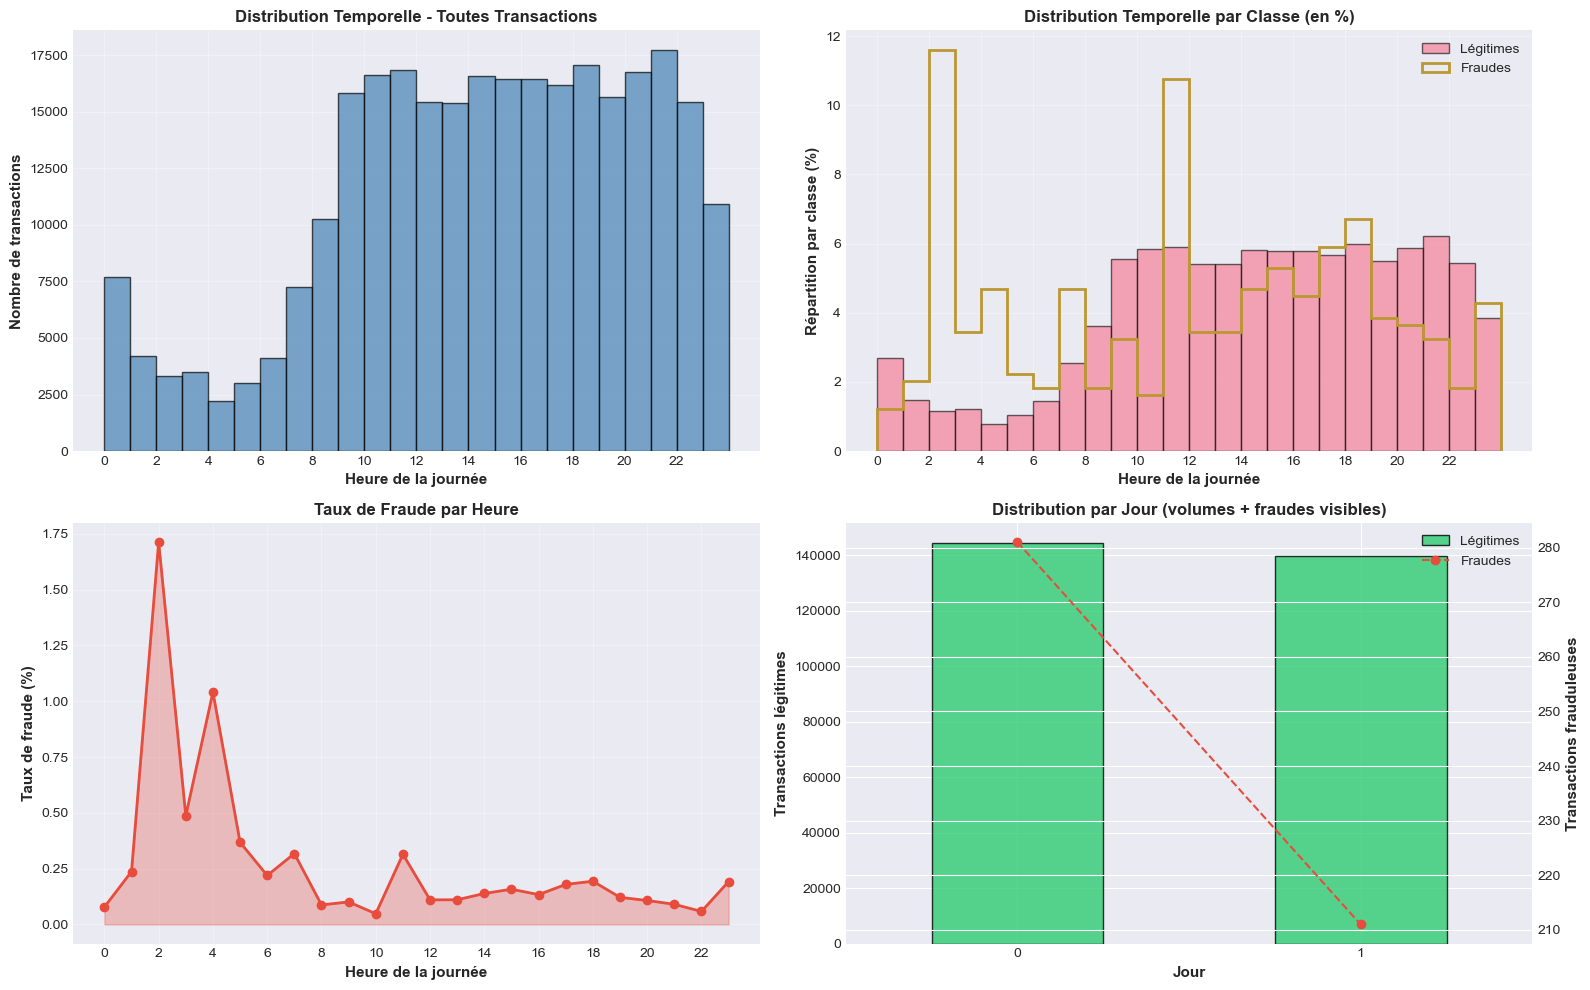


 Statistiques temporelles:
   • Heure avec le plus de fraudes: 2h
   • Taux de fraude le plus élevé: 1.7127% à 2h
   • Taux de fraude le plus faible: 0.0482% à 10h




In [24]:
# ============================================================================
# 5. ANALYSE DE LA VARIABLE TIME
# ============================================================================

print(" ANALYSE DE LA VARIABLE TIME")
print("="*80)

import numpy as np

# Conversion en heures/jours (+ version heure entière pour un binning 0..23 propre)
df['Hour'] = (df['Time'] / 3600) % 24
df['HourInt'] = ((df['Time'] % 86400) // 3600).astype(int)  # 0..23
df['Day'] = (df['Time'] / 86400).astype(int)

print(f"\n Période couverte: {df['Day'].max() + 1} jours")
print(f"  Plage horaire: 0h à 24h")

# Figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ---------------------------------------------------------------------------
# (0,0) Distribution par heure - toutes transactions (volumes)
axes[0, 0].hist(df['HourInt'], bins=np.arange(25), color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Heure de la journée', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Nombre de transactions', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution Temporelle - Toutes Transactions', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(0, 24, 2))
axes[0, 0].grid(alpha=0.3)

# ---------------------------------------------------------------------------
# (0,1) Distribution par heure - profils % par classe (rend visible la fraude)
fraud_hours = df[df['Class'] == 1]['HourInt']
legit_hours = df[df['Class'] == 0]['HourInt']

# Poids en % pour comparer des formes et pas des volumes
w_legit = np.ones_like(legit_hours) * (100.0 / max(len(legit_hours), 1))
w_fraud = np.ones_like(fraud_hours) * (100.0 / max(len(fraud_hours), 1))

# Légitimes en barres, Fraudes en contour par-dessus
axes[0, 1].hist(legit_hours, bins=np.arange(25), weights=w_legit,
                alpha=0.6, edgecolor='black', label='Légitimes')
axes[0, 1].hist(fraud_hours, bins=np.arange(25), weights=w_fraud,
                histtype='step', linewidth=2, label='Fraudes')

axes[0, 1].set_xlabel('Heure de la journée', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Répartition par classe (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distribution Temporelle par Classe (en %)', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(0, 24, 2))
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# ---------------------------------------------------------------------------
# (1,0) Taux de fraude par heure (% sur l'ensemble à cette heure)
hourly_fraud_rate = df.groupby('HourInt')['Class'].agg(['sum', 'count'])
hourly_fraud_rate['fraud_rate'] = (hourly_fraud_rate['sum'] / hourly_fraud_rate['count']) * 100

axes[1, 0].plot(hourly_fraud_rate.index, hourly_fraud_rate['fraud_rate'],
                marker='o', linewidth=2, markersize=6, color='#e74c3c')
axes[1, 0].fill_between(hourly_fraud_rate.index, hourly_fraud_rate['fraud_rate'],
                        alpha=0.3, color='#e74c3c')
axes[1, 0].set_xlabel('Heure de la journée', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Taux de fraude (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Taux de Fraude par Heure', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(alpha=0.3)

# ---------------------------------------------------------------------------
# (1,1) Distribution par jour : barres légitimes + courbe fraudes (double axe)
daily = df.groupby(['Day','Class']).size().unstack(fill_value=0).reindex(columns=[0,1], fill_value=0)

ax_bar = axes[1, 1]
daily[0].plot(kind='bar', ax=ax_bar, color='#2ecc71', alpha=0.8, edgecolor='black', label='Légitimes')
ax_bar.set_xlabel('Jour', fontsize=11, fontweight='bold')
ax_bar.set_ylabel('Transactions légitimes', fontsize=11, fontweight='bold')
ax_bar.set_title('Distribution par Jour (volumes + fraudes visibles)', fontsize=12, fontweight='bold')
ax_bar.tick_params(axis='x', rotation=0)

ax_line = ax_bar.twinx()
ax_line.plot(daily.index, daily[1], marker='o', linestyle='--', color='#e74c3c', label='Fraudes')
ax_line.set_ylabel('Transactions frauduleuses', fontsize=11, fontweight='bold')

# Légende combinée
h1, l1 = ax_bar.get_legend_handles_labels()
h2, l2 = ax_line.get_legend_handles_labels()
ax_bar.legend(h1 + h2, l1 + l2, loc='upper right')

# ---------------------------------------------------------------------------
plt.tight_layout()
plt.savefig('reports/figures/02_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------------------------
# Statistiques temporelles
print(f"\n Statistiques temporelles:")
if len(fraud_hours) > 0:
    print(f"   • Heure avec le plus de fraudes: {fraud_hours.mode()[0]:.0f}h")
else:
    print("   • Heure avec le plus de fraudes: aucune fraude présente")
print(f"   • Taux de fraude le plus élevé: {hourly_fraud_rate['fraud_rate'].max():.4f}% à {hourly_fraud_rate['fraud_rate'].idxmax():.0f}h")
print(f"   • Taux de fraude le plus faible: {hourly_fraud_rate['fraud_rate'].min():.4f}% à {hourly_fraud_rate['fraud_rate'].idxmin():.0f}h")

print("\n" + "="*80 + "\n")

ANALYSE DE LA VARIABLE AMOUNT

 Statistiques des montants par classe:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


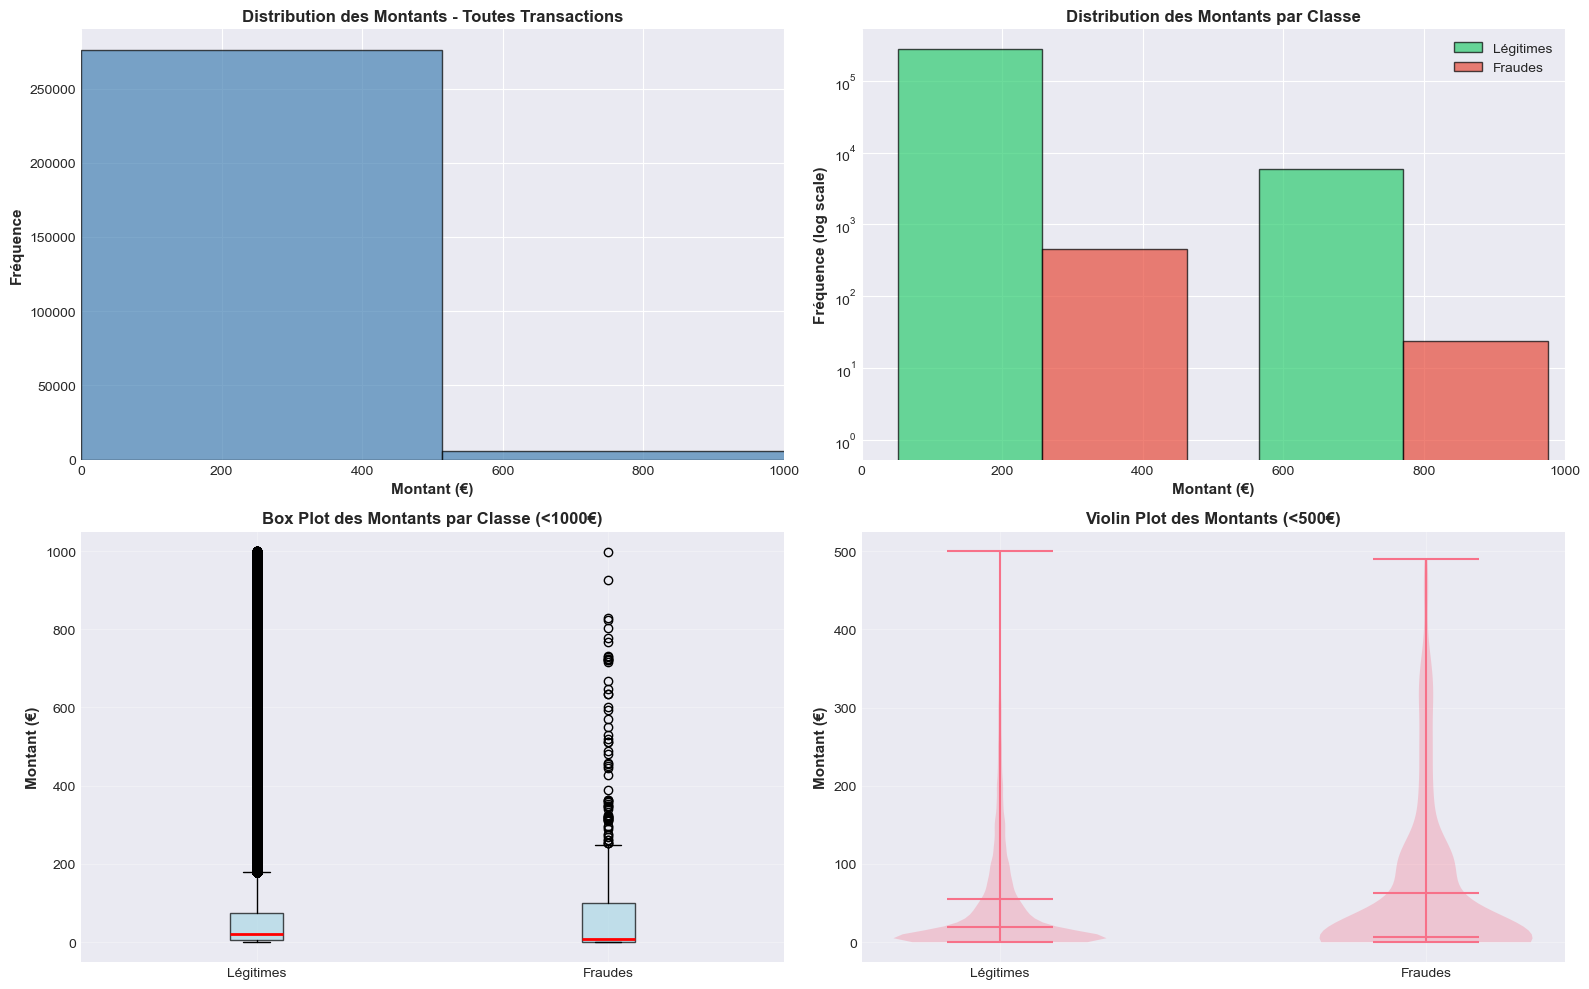


🔬 Test de Mann-Whitney U:
   • Statistique: 61833399.00
   • P-value: 8.58e-06
  Différence significative entre les distributions (p < 0.05)




In [25]:
# ============================================================================
# 6. ANALYSE DE LA VARIABLE AMOUNT
# ============================================================================

print("ANALYSE DE LA VARIABLE AMOUNT")
print("="*80)

# Statistiques par classe
print("\n Statistiques des montants par classe:")
print(df.groupby('Class')['Amount'].describe())

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Distribution globale
axes[0, 0].hist(df['Amount'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Montant (€)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution des Montants - Toutes Transactions', fontsize=12, fontweight='bold')
axes[0, 0].set_xlim([0, 1000])

# Distribution par classe (échelle log)
fraud_amounts = df[df['Class'] == 1]['Amount']
legit_amounts = df[df['Class'] == 0]['Amount']

axes[0, 1].hist([legit_amounts, fraud_amounts], bins=50, 
                label=['Légitimes', 'Fraudes'],
                color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Montant (€)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Fréquence (log scale)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distribution des Montants par Classe', fontsize=12, fontweight='bold')
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlim([0, 1000])
axes[0, 1].legend()

# Box plots
df_plot = df[df['Amount'] < 1000].copy()  # Limiter pour meilleure visualisation
axes[1, 0].boxplot([df_plot[df_plot['Class'] == 0]['Amount'],
                     df_plot[df_plot['Class'] == 1]['Amount']],
                    labels=['Légitimes', 'Fraudes'],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Montant (€)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Box Plot des Montants par Classe (<1000€)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Violin plot
parts = axes[1, 1].violinplot([legit_amounts[legit_amounts < 500], 
                                fraud_amounts[fraud_amounts < 500]],
                               positions=[0, 1], showmeans=True, showmedians=True)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Légitimes', 'Fraudes'])
axes[1, 1].set_ylabel('Montant (€)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Violin Plot des Montants (<500€)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/03_amount_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Test statistique
statistic, pvalue = stats.mannwhitneyu(fraud_amounts, legit_amounts)
print(f"\n🔬 Test de Mann-Whitney U:")
print(f"   • Statistique: {statistic:.2f}")
print(f"   • P-value: {pvalue:.2e}")
if pvalue < 0.05:
    print(f"  Différence significative entre les distributions (p < 0.05)")
else:
    print(f" Pas de différence significative (p >= 0.05)")

print("\n" + "="*80 + "\n")

ANALYSE DES VARIABLES V1-V28 (PCA)

 Nombre de composantes PCA: 28

 Statistiques moyennes des composantes PCA par classe:
Class         0         1
V1     0.008258 -4.771948
V2    -0.006271  3.623778
V3     0.012171 -7.033281
V4    -0.007860  4.542029
V5     0.005453 -3.151225
V6     0.002419 -1.397737
V7     0.009637 -5.568731
V8    -0.000987  0.570636
V9     0.004467 -2.581123
V10    0.009824 -5.676883


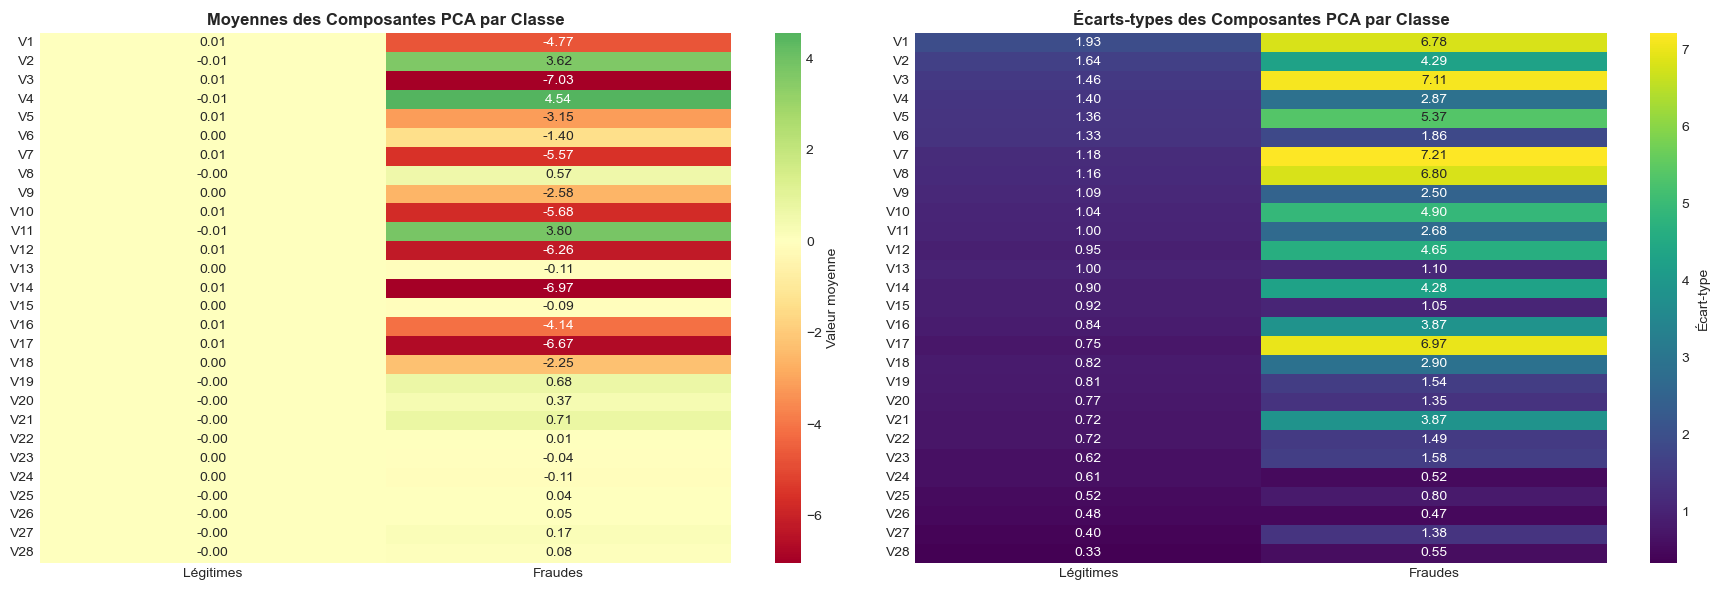

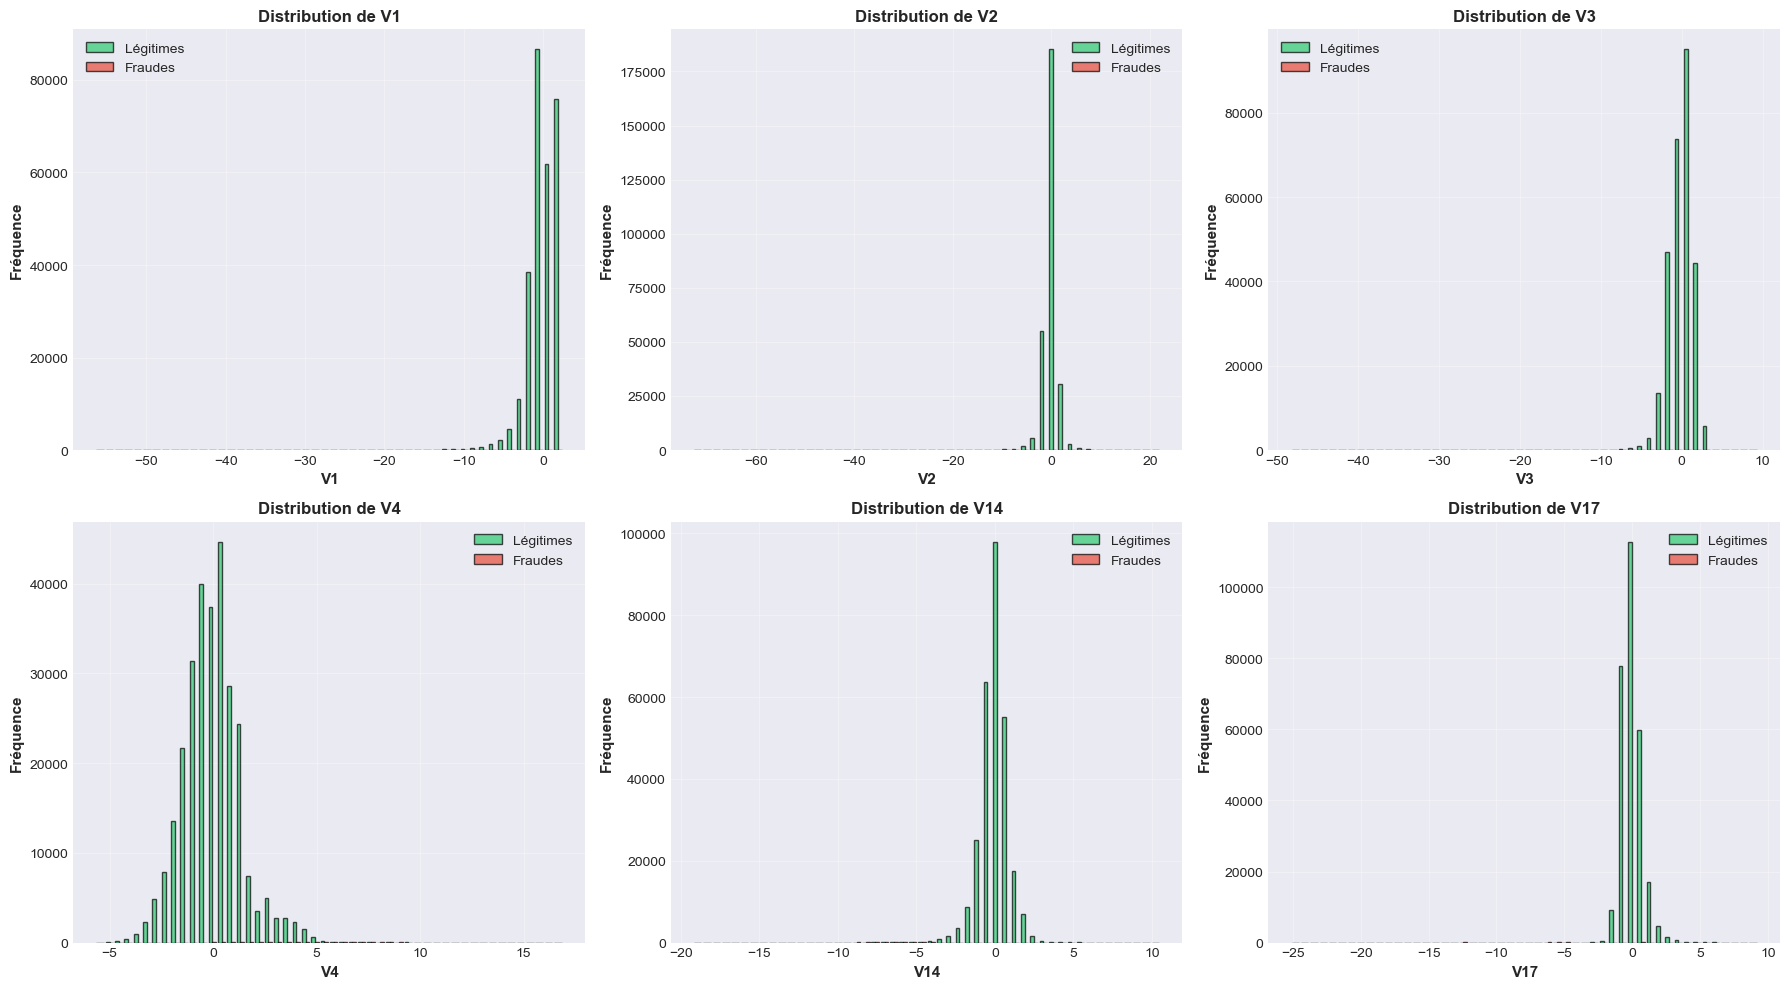


 Variables avec séparation visuelle forte suggèrent un bon pouvoir prédictif




In [26]:
# ============================================================================
# 7. ANALYSE DES VARIABLES V1-V28 (PCA)
# ============================================================================

print("ANALYSE DES VARIABLES V1-V28 (PCA)")
print("="*80)

# Sélection des colonnes PCA
pca_cols = [col for col in df.columns if col.startswith('V')]
print(f"\n Nombre de composantes PCA: {len(pca_cols)}")

# Statistiques des variables PCA par classe
print("\n Statistiques moyennes des composantes PCA par classe:")
pca_stats = df.groupby('Class')[pca_cols].mean().T
print(pca_stats.head(10))

# Visualisation: Heatmap des moyennes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Moyennes par classe
mean_fraud = df[df['Class'] == 1][pca_cols].mean().values.reshape(-1, 1)
mean_legit = df[df['Class'] == 0][pca_cols].mean().values.reshape(-1, 1)
means_combined = np.hstack([mean_legit, mean_fraud])

sns.heatmap(means_combined, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            xticklabels=['Légitimes', 'Fraudes'], yticklabels=pca_cols,
            ax=axes[0], cbar_kws={'label': 'Valeur moyenne'})
axes[0].set_title('Moyennes des Composantes PCA par Classe', fontsize=12, fontweight='bold')

# Écarts-types par classe
std_fraud = df[df['Class'] == 1][pca_cols].std().values.reshape(-1, 1)
std_legit = df[df['Class'] == 0][pca_cols].std().values.reshape(-1, 1)
stds_combined = np.hstack([std_legit, std_fraud])

sns.heatmap(stds_combined, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=['Légitimes', 'Fraudes'], yticklabels=pca_cols,
            ax=axes[1], cbar_kws={'label': 'Écart-type'})
axes[1].set_title('Écarts-types des Composantes PCA par Classe', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('reports/figures/04_pca_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution de quelques variables clés
key_vars = ['V1', 'V2', 'V3', 'V4', 'V14', 'V17']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, var in enumerate(key_vars):
    axes[i].hist([df[df['Class'] == 0][var], df[df['Class'] == 1][var]],
                 bins=50, label=['Légitimes', 'Fraudes'],
                 color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
    axes[i].set_xlabel(var, fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
    axes[i].set_title(f'Distribution de {var}', fontsize=12, fontweight='bold')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('reports/figures/05_key_variables_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Variables avec séparation visuelle forte suggèrent un bon pouvoir prédictif")
print("\n" + "="*80 + "\n")

 ANALYSE DES CORRÉLATIONS

 Top 10 variables les plus corrélées avec Class (fraude):
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

 Top 10 variables les moins corrélées (négativement) avec Class:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


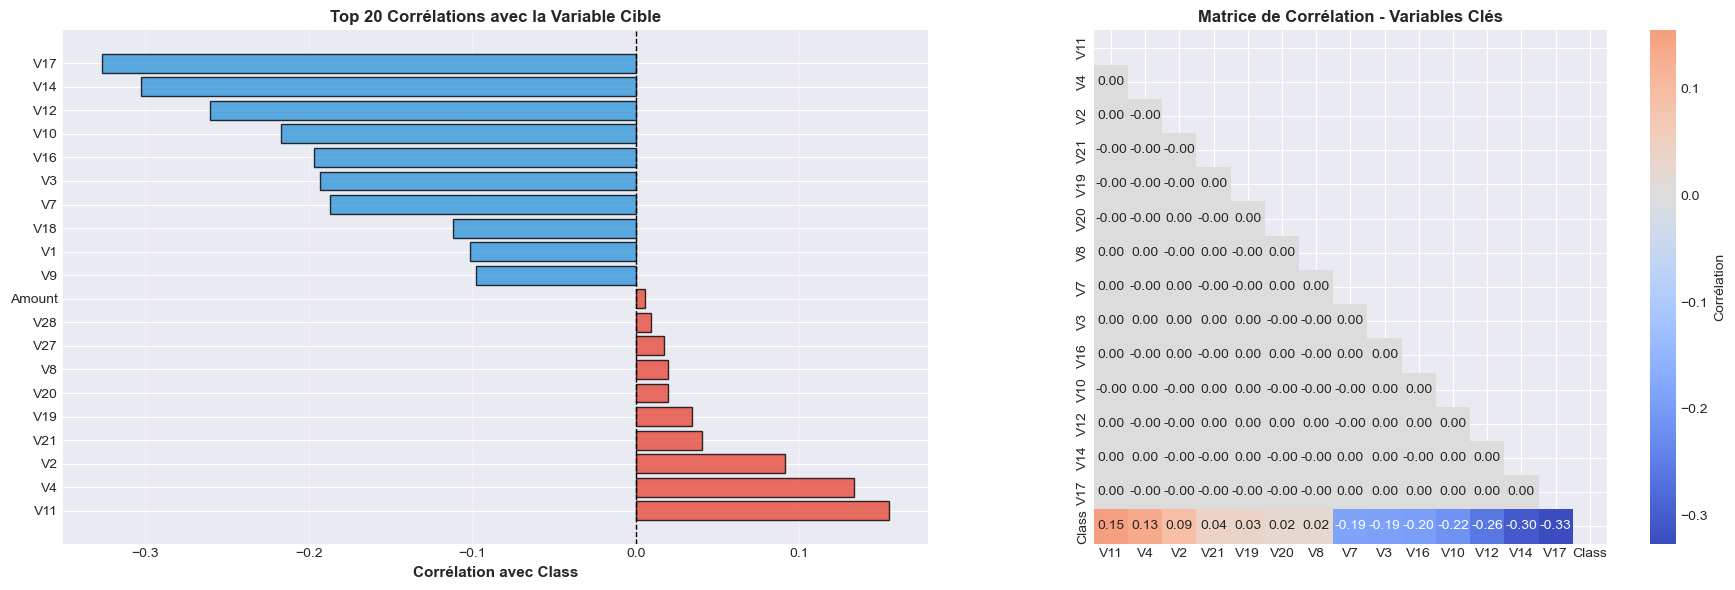

In [27]:
# ============================================================================
# 8. MATRICE DE CORRÉLATION
# ============================================================================

print(" ANALYSE DES CORRÉLATIONS")
print("="*80)

# Corrélation avec la variable cible
correlations = df[pca_cols + ['Amount', 'Class']].corr()['Class'].drop('Class').sort_values(ascending=False)

print("\n Top 10 variables les plus corrélées avec Class (fraude):")
print(correlations.head(10))
print("\n Top 10 variables les moins corrélées (négativement) avec Class:")
print(correlations.tail(10))

# Visualisation des corrélations avec Class
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot des corrélations
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])
colors_corr = ['#e74c3c' if x > 0 else '#3498db' for x in top_corr.values]
axes[0].barh(range(len(top_corr)), top_corr.values, color=colors_corr, alpha=0.8, edgecolor='black')
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index)
axes[0].set_xlabel('Corrélation avec Class', fontsize=11, fontweight='bold')
axes[0].set_title('Top 20 Corrélations avec la Variable Cible', fontsize=12, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0].grid(alpha=0.3, axis='x')

# Heatmap de corrélation (sélection de variables)
selected_vars = list(correlations.head(7).index) + list(correlations.tail(7).index) + ['Class']
corr_matrix = df[selected_vars].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=axes[1], cbar_kws={'label': 'Corrélation'})
axes[1].set_title('Matrice de Corrélation - Variables Clés', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('reports/figures/06_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80 + "\n")

 DÉTECTION DES OUTLIERS

 Outliers dans Amount:
   • Nombre: 31,904 (11.20%)

 Outliers dans les variables PCA (V1-V28):
   Variable  Count  Percentage
26      V27  39163   13.750715
27      V28  30342   10.653530
19      V20  27770    9.750463
7        V8  24134    8.473809
5        V6  22965    8.063355
22      V23  18541    6.510023
11      V12  15348    5.388912
20      V21  14497    5.090114
13      V14  14149    4.967926
1        V2  13526    4.749181


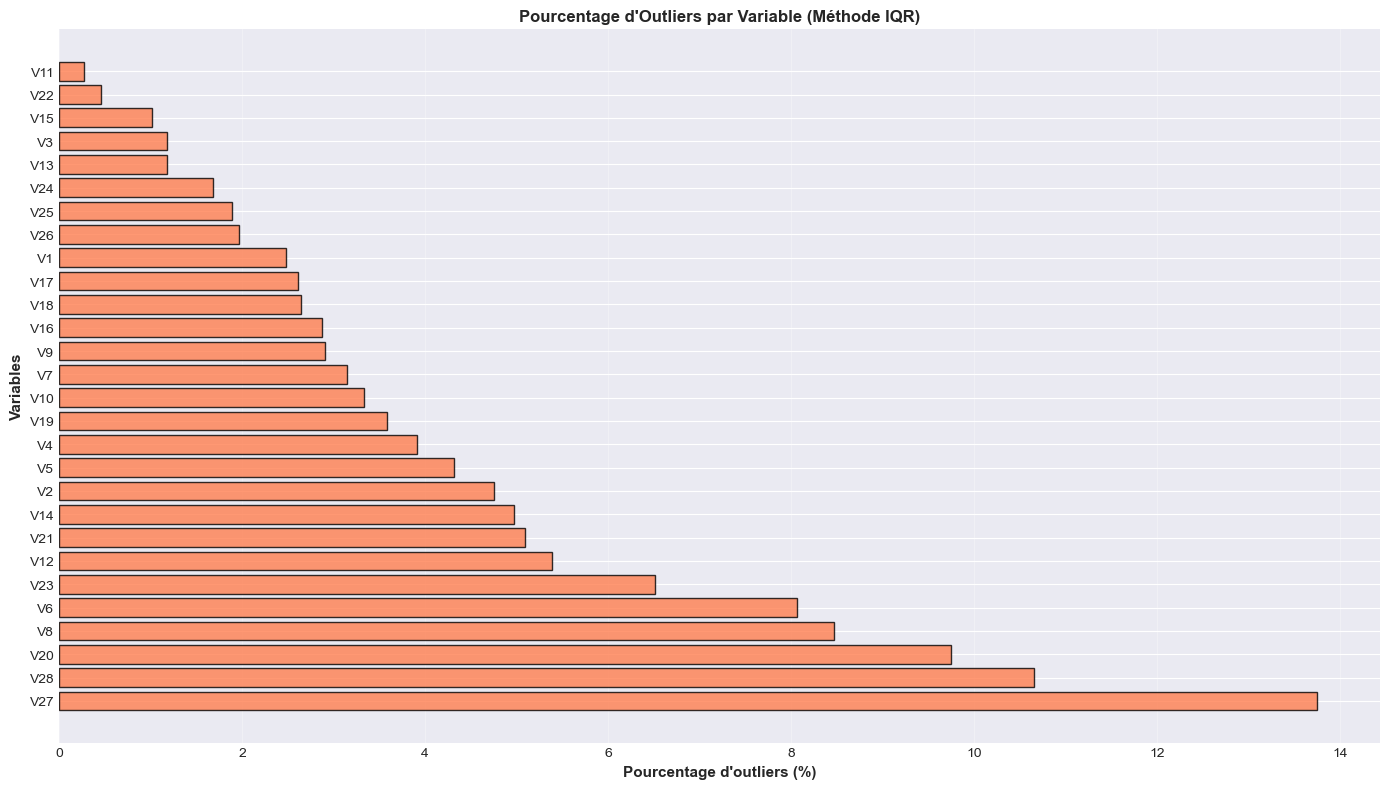


 Les outliers peuvent être des fraudes - ne pas les supprimer automatiquement!




In [28]:
# ============================================================================
# 9. DÉTECTION DES OUTLIERS
# ============================================================================

print(" DÉTECTION DES OUTLIERS")
print("="*80)

def count_outliers_iqr(data, column):
    """Compte les outliers avec la méthode IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), (len(outliers) / len(data)) * 100

# Analyse des outliers pour Amount
outliers_count, outliers_pct = count_outliers_iqr(df, 'Amount')
print(f"\n Outliers dans Amount:")
print(f"   • Nombre: {outliers_count:,} ({outliers_pct:.2f}%)")

# Analyse des outliers dans les variables PCA
print(f"\n Outliers dans les variables PCA (V1-V28):")
outlier_summary = []
for col in pca_cols:
    count, pct = count_outliers_iqr(df, col)
    outlier_summary.append({'Variable': col, 'Count': count, 'Percentage': pct})

outlier_df = pd.DataFrame(outlier_summary).sort_values('Percentage', ascending=False)
print(outlier_df.head(10))

# Visualisation
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(outlier_df['Variable'], outlier_df['Percentage'], 
        color='coral', alpha=0.8, edgecolor='black')
ax.set_xlabel('Pourcentage d\'outliers (%)', fontsize=11, fontweight='bold')
ax.set_ylabel('Variables', fontsize=11, fontweight='bold')
ax.set_title('Pourcentage d\'Outliers par Variable (Méthode IQR)', 
             fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('reports/figures/07_outliers_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Les outliers peuvent être des fraudes - ne pas les supprimer automatiquement!")
print("\n" + "="*80 + "\n")

In [29]:
# ============================================================================
# 10. SYNTHÈSE ET RECOMMANDATIONS
# ============================================================================

print(" SYNTHÈSE DE l'analyse exploratoire")
print("="*80)

print("""
CONSTATS PRINCIPAUX:

1.  DÉSÉQUILIBRE DES CLASSES
   • 99.83% de transactions légitimes vs 0.17% de fraudes
   • Ratio: 1:578 - nécessite SMOTE ou techniques de rééchantillonnage
   • Métriques adaptées: Precision-Recall, F1, AUC-ROC

2.  PATTERNS TEMPORELS
   • Variations du taux de fraude selon l'heure
   • Pics de fraude potentiellement identifiables
   • Feature engineering possible: période de la journée

3.  MONTANTS DES TRANSACTIONS
   • Distribution différente entre fraudes et transactions légitimes
   • Nécessite normalisation (StandardScaler)
   • Potentiel discriminant pour les modèles

4.  VARIABLES PCA (V1-V28)
   • Plusieurs variables montrent une séparation claire
   • Certaines fortement corrélées avec la fraude (V14, V17, V12, V10)
   • Variables négativement corrélées aussi importantes (V1, V3, V9)

5.  OUTLIERS
   • Présence significative d'outliers
   • Ne pas les supprimer - peuvent être des fraudes légitimes
   • Utiliser des modèles robustes (Tree-based)

""")

print("="*80)
print("\n EDA TERMINÉE - Prêt pour la phase de preprocessing et modélisation!")
print("\n Graphiques sauvegardés dans: reports/figures/")
print("\n Prochaine étape: 02_preprocessing.ipynb")
print("="*80)

# Sauvegarde des statistiques clés pour référence
stats_summary = {
    'total_transactions': len(df),
    'fraud_count': int(class_counts[1]),
    'fraud_percentage': float(class_percentages[1]),
    'imbalance_ratio': int(class_counts[0]/class_counts[1]),
    'top_correlated_features': list(correlations.head(5).index),
    'amount_mean_fraud': float(fraud_amounts.mean()),
    'amount_mean_legit': float(legit_amounts.mean())
}

import json
with open('reports/eda_summary.json', 'w') as f:
    json.dump(stats_summary, f, indent=4)

print("\n Statistiques clés sauvegardées: reports/eda_summary.json")

 SYNTHÈSE DE l'analyse exploratoire

CONSTATS PRINCIPAUX:

1.  DÉSÉQUILIBRE DES CLASSES
   • 99.83% de transactions légitimes vs 0.17% de fraudes
   • Ratio: 1:578 - nécessite SMOTE ou techniques de rééchantillonnage
   • Métriques adaptées: Precision-Recall, F1, AUC-ROC

2.  PATTERNS TEMPORELS
   • Variations du taux de fraude selon l'heure
   • Pics de fraude potentiellement identifiables
   • Feature engineering possible: période de la journée

3.  MONTANTS DES TRANSACTIONS
   • Distribution différente entre fraudes et transactions légitimes
   • Nécessite normalisation (StandardScaler)
   • Potentiel discriminant pour les modèles

4.  VARIABLES PCA (V1-V28)
   • Plusieurs variables montrent une séparation claire
   • Certaines fortement corrélées avec la fraude (V14, V17, V12, V10)
   • Variables négativement corrélées aussi importantes (V1, V3, V9)

5.  OUTLIERS
   • Présence significative d'outliers
   • Ne pas les supprimer - peuvent être des fraudes légitimes
   • Utiliser des 